# Car Price Prediction Project

## Determines
Auto Scout data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, used the data set which is already preprocessed and prepared for algorithms .


## Tasks
1. Import Modules, Load Data and Data Review
2. Data Pre-Processing
3. Implement Linear Regression
4. Implement Ridge Regression
5. Implement Lasso Regression
6. Implement Elastic-Net
7. Feature İmportance
8. Final Model

## 1. Import Modules, Load Data and Data Review

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [5]:
df = pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [8]:
df.duplicated().sum()

1673

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.make_model.value_counts()

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: make_model, dtype: int64

In [12]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

Index(['Renault Duster', 'Audi A2'], dtype='object')

In [13]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [14]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [15]:
df.vat.value_counts()

VAT deductible      13405
Price negotiable      816
Name: vat, dtype: int64

In [16]:
df.Type.value_counts()

Used              10163
New                1358
Pre-registered     1029
Employee's car      904
Demonstration       767
Name: Type, dtype: int64

In [17]:
df.Fuel.value_counts()

Benzine     7538
Diesel      6618
LPG/CNG       60
Electric       5
Name: Fuel, dtype: int64

In [18]:
df.Gears.value_counts()

6.000    7743
5.000    3771
7.000    2504
8.000     203
Name: Gears, dtype: int64

In [19]:
df.Comfort_Convenience.value_counts()

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   312
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                                   177
Air conditioning,Armre

In [20]:
df.Entertainment_Media.value_counts()

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                                        1562
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                                    1066
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                           876
On-board computer                                                                                                  514
Radio                                                                                                              495
Bluetooth,Hands-free equipment,On-board computer,Radio                                                             476
On-board computer,Radio                                                                                            441
Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,USB                                               386
Bluetooth,On-board computer,Radio               

In [21]:
df.Paint_Type.value_counts()

Metallic       13678
Uni/basic        532
Perl effect       11
Name: Paint_Type, dtype: int64

In [22]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 7
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6195
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4441
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [23]:
df.isna().any()

make_model             False
body_type              False
price                  False
vat                    False
km                     False
Type                   False
Fuel                   False
Gears                  False
Comfort_Convenience    False
Entertainment_Media    False
Extras                 False
Safety_Security        False
age                    False
Previous_Owners        False
hp_kW                  False
Inspection_new         False
Paint_Type             False
Upholstery_type        False
Gearing_Type           False
Displacement_cc        False
Weight_kg              False
Drive_chain            False
cons_comb              False
dtype: bool

<Axes: xlabel='price', ylabel='Count'>

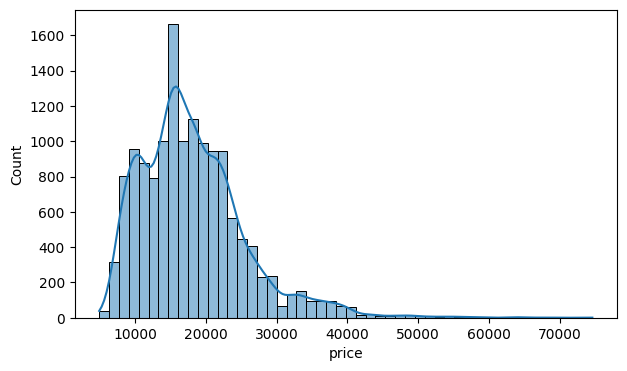

In [24]:
sns.histplot(df.price, bins=50, kde=True)

In [25]:
skew(df.price)

1.2668278550941403

In [26]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
14216,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700
14217,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
14218,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800
14219,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400


<Axes: >

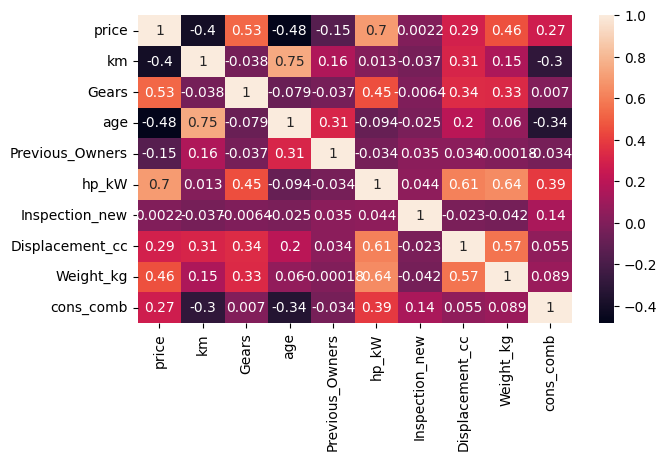

In [27]:
sns.heatmap(df_numeric.corr(), annot =True)

### multicollinearity control

In [28]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

False

### Outliers in Price Column

<Axes: >

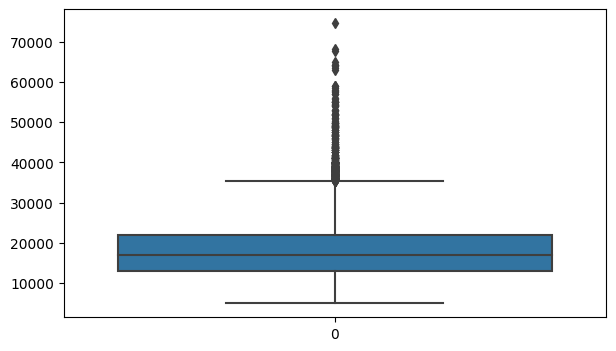

In [29]:
sns.boxplot(df.price)

In [30]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.

 The count of outlier for Audi A1                  : 5 ,    The rate of outliers : 0.002
 The count of outlier for Audi A3                  : 56,    The rate of outliers : 0.02
 The count of outlier for Opel Astra               : 127,    The rate of outliers : 0.055
 The count of outlier for Opel Corsa               : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Insignia            : 109,    The rate of outliers : 0.045
 The count of outlier for Renault Clio             : 37,    The rate of outliers : 0.025
 The count of outlier for Renault Espace           : 20,    The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


## 2. Data Pre-Processing

In [31]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(',')))

In [32]:
df["Entertainment_Media"] = df.Entertainment_Media.apply(lambda x: len(x.split(',')))

In [33]:
df["Comfort_Convenience"] = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))

In [34]:
df["Safety_Security"] = df.Safety_Security.apply(lambda x: len(x.split(',')))

In [35]:
df.head(5)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [36]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']



### Dropping outliers

In [37]:
df2 = df.copy()

In [38]:
for model in df2.make_model.unique():

    car_prices = df2[df2["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)

    IQR = Q3-Q1

    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
df2

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,Renault Espace,Van,39980,VAT deductible,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1734.000,front,4.700
14217,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
14218,Renault Espace,Van,39950,VAT deductible,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1734.000,front,6.800
14219,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400


### Train | Test Split

In [39]:
X1= df.drop("price", axis=1)
y1= df["price"]

In [40]:
X2= df2.drop("price", axis=1)
y2= df2["price"]

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [42]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [43]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Convertible' 'Off-Road'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Paint_Type                    : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type               : ['Cloth' 'Part/Full Leather']
Gearing_Type                  : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain                   : ['front' '4WD' 'rear']


In [44]:
cat_onehot = ['make_model', 'body_type','vat','Fuel', 'Paint_Type', 'Upholstery_type',
              'Gearing_Type', 'Drive_chain']
cat_ordinal = ['Type']
cat_for_Type = ['Used' , "Employee's car", 'New' ,'Demonstration' ,'Pre-registered']

In [45]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler


column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_Type]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [46]:
X_train_trans1 = column_trans.fit_transform(X_train1)
X_test_trans1 = column_trans.transform(X_test1)

In [47]:
X_train_trans2 = column_trans.fit_transform(X_train2)
X_test_trans2 = column_trans.transform(X_test2)

## 3.Implement Linear Regression

### With Outliers

In [104]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_trans1, y_train1)

LinearRegression()

In [52]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [105]:
train_val(lm, X_train_trans1, y_train1, X_test_trans1, y_test1)

,train,test
R2,0.862,0.860
mae,1929.066,1903.003
mse,7618361.884,7699329.129
rmse,2760.138,2774.766


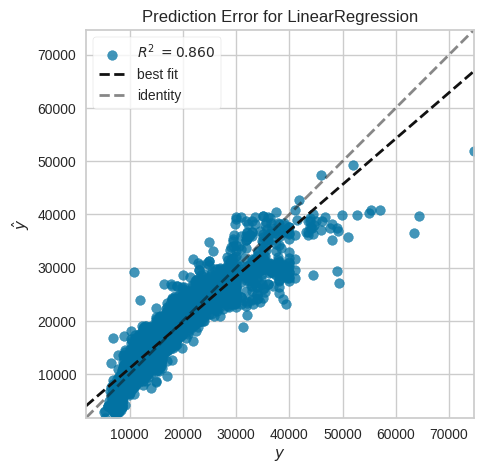

In [106]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_trans1, y_train1) # Fit the training data to the visualizer
visualizer.score(X_test_trans1, y_test1) # Evaluate the model on the test data
visualizer.show();

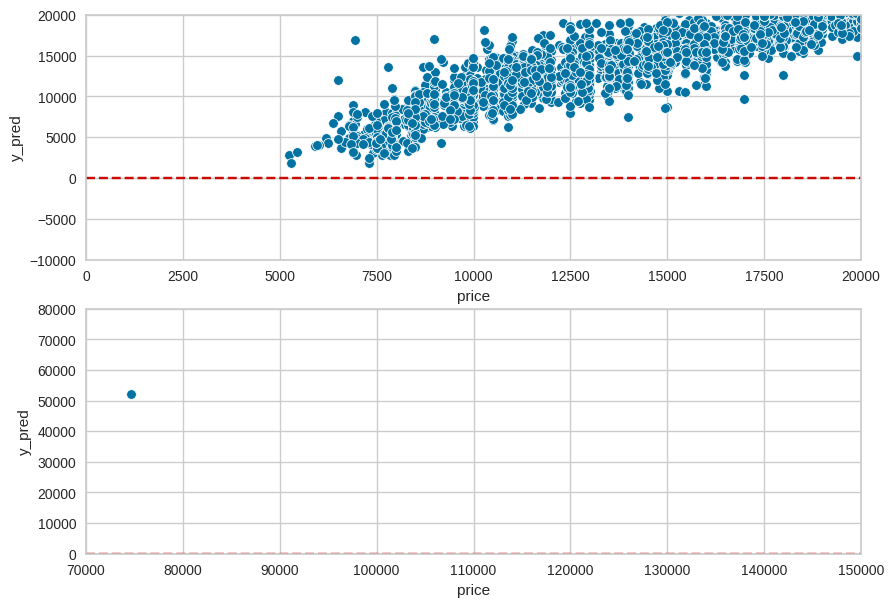

In [51]:
y_pred=lm.predict(X_test_trans1)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test1, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test1, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();

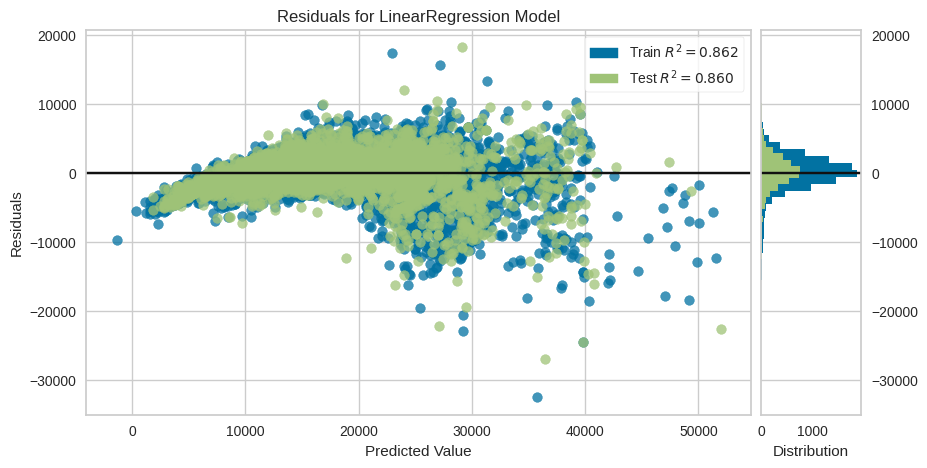

In [52]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_trans1, y_train1) # Fit the training data to the visualizer
visualizer.score(X_test_trans1, y_test1) # Evaluate the model on the test data
visualizer.show();

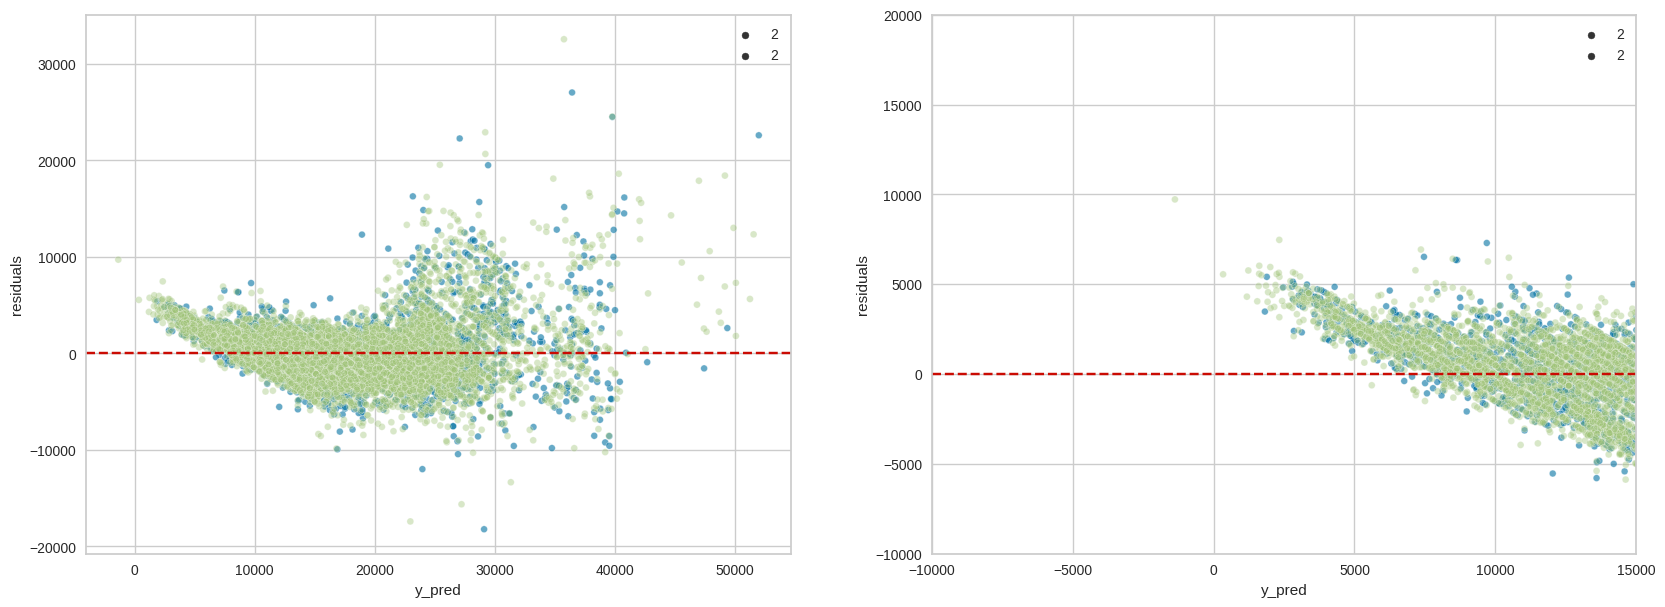

In [53]:
y_pred=lm.predict(X_test_trans1)
y_pred_train = lm.predict(X_train_trans1)

residual_test = y_test1-y_pred
residual_train = y_train1-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


In [77]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [78]:
y_pred = lm.predict(X_test_trans1)
adj_r2(y_test1, y_pred, X1)

0.8597571188290296

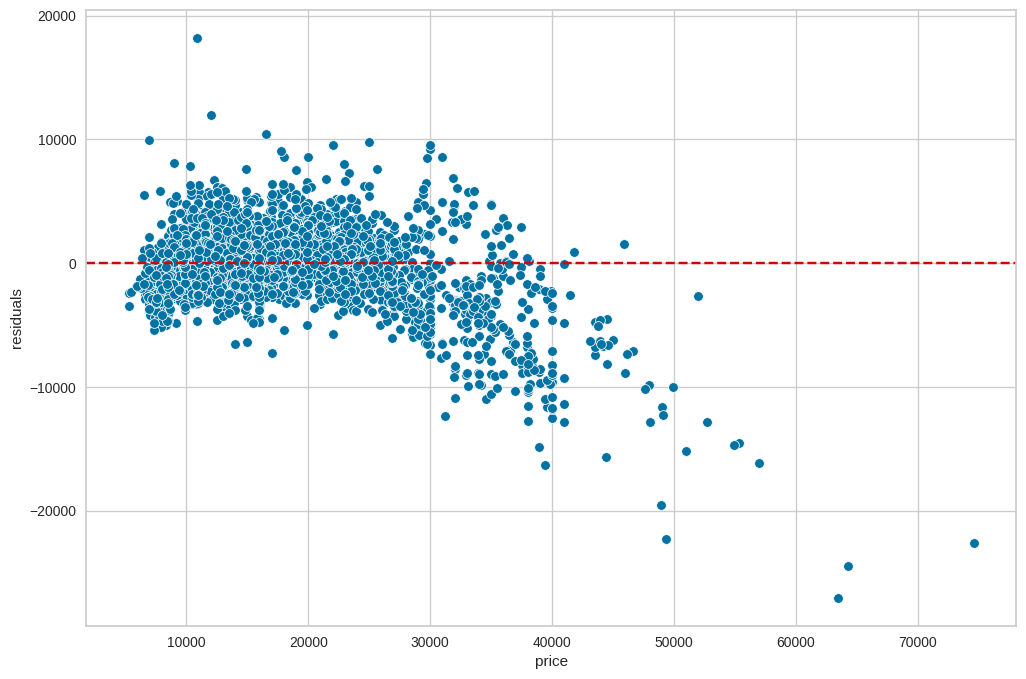

In [65]:
plt.figure(figsize=(12,8))
residuals = y_test1-y_pred

sns.scatterplot(x = y_test1, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [79]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

scores = cross_validate(model,
                        X_train_trans1,
                        y_train1,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [64]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.044,0.025,0.866,0.861,-1939.911,-1925.473,-7787118.087,-7603121.503,-2790.541,-2757.376
1,0.061,0.014,0.877,0.860,-1895.184,-1939.753,-6662085.688,-7728864.620,-2581.102,-2780.084
2,0.065,0.009,0.865,0.861,-1831.538,-1947.342,-6475212.227,-7749952.417,-2544.644,-2783.874
3,0.066,0.013,0.866,0.861,-1892.174,-1941.344,-6669233.493,-7730254.229,-2582.486,-2780.333
4,0.090,0.011,0.841,0.864,-1928.921,-1931.182,-7789273.107,-7609912.798,-2790.927,-2758.607
5,0.065,0.008,0.867,0.861,-1983.651,-1916.370,-8716487.448,-7515155.201,-2952.370,-2741.378
6,0.061,0.009,0.854,0.863,-2002.570,-1919.571,-7943765.959,-7587172.168,-2818.469,-2754.482
7,0.064,0.009,0.855,0.863,-1944.385,-1927.499,-8439432.446,-7531402.804,-2905.070,-2744.340
8,0.062,0.008,0.848,0.863,-2051.457,-1913.023,-8560045.057,-7520085.452,-2925.755,-2742.277
9,0.069,0.008,0.854,0.863,-1943.254,-1924.171,-8356677.318,-7546454.506,-2890.792,-2747.081


### Without Outliers

In [107]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_trans2, y_train2)

LinearRegression()

In [ ]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [108]:
train_val(lm, X_train_trans2, y_train2, X_test_trans2, y_test2)

,train,test
R2,0.882,0.880
mae,1653.590,1657.665
mse,5386004.452,5446290.179
rmse,2320.777,2333.729


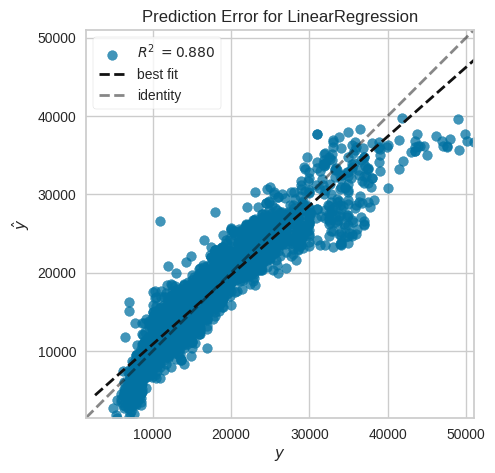

In [109]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_trans2, y_train2) # Fit the training data to the visualizer
visualizer.score(X_test_trans2, y_test2) # Evaluate the model on the test data
visualizer.show();

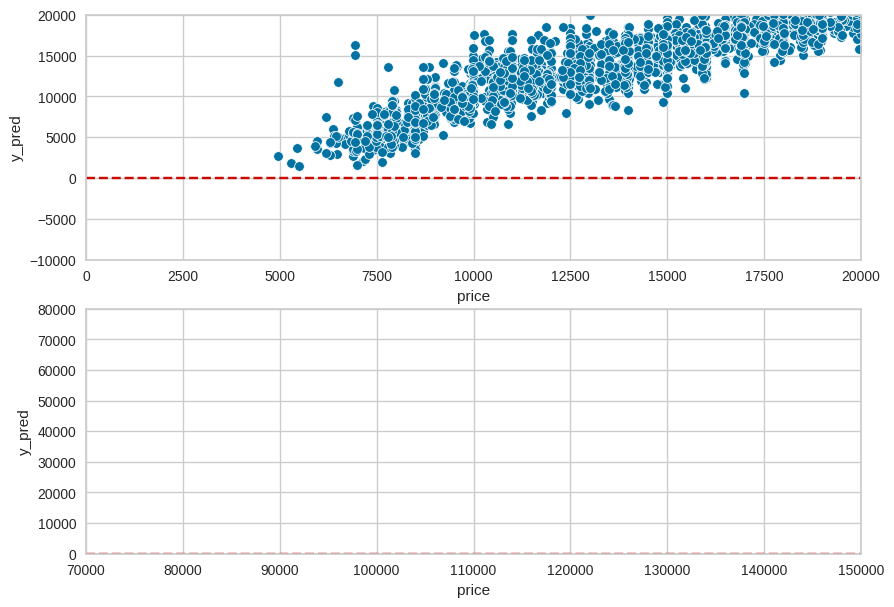

In [110]:
y_pred=lm.predict(X_test_trans2)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test2, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test2, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();

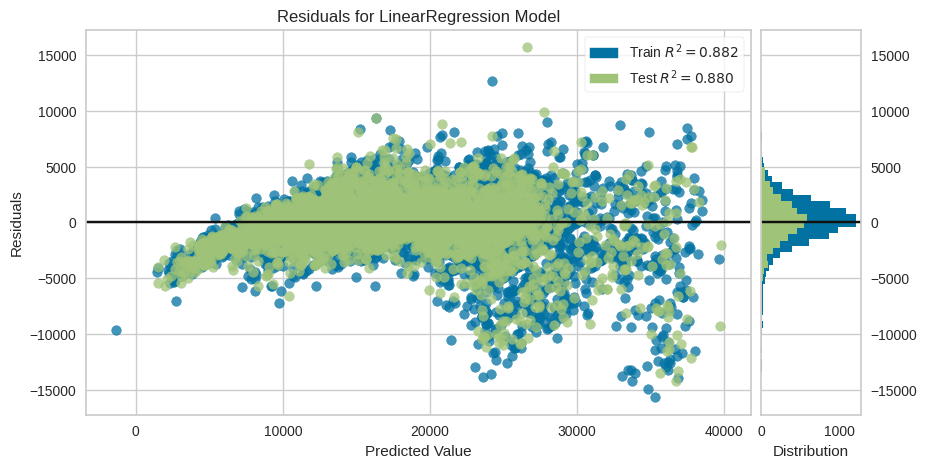

In [111]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_trans2, y_train2) # Fit the training data to the visualizer
visualizer.score(X_test_trans2, y_test2) # Evaluate the model on the test data
visualizer.show();

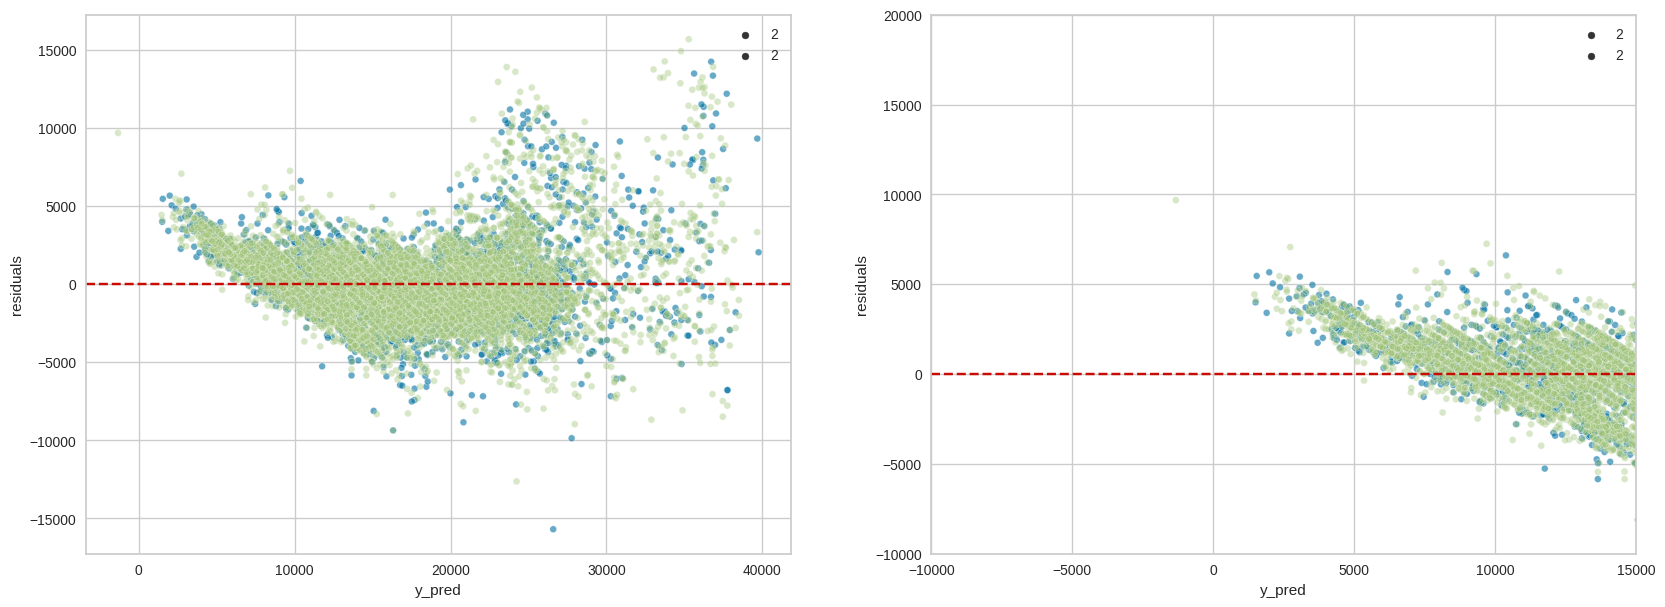

In [112]:
y_pred=lm.predict(X_test_trans2)
y_pred_train = lm.predict(X_train_trans2)

residual_test = y_test2-y_pred
residual_train = y_train2-y_pred_train

plt.figure(figsize=(20,7))
plt.subplot(121)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")

plt.subplot(122)

sns.scatterplot(x = y_pred, y = residual_test, palette="deep", size=2, alpha=0.6)
sns.scatterplot(x = y_pred_train, y = residual_train, size=2, alpha=0.4)

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.xlabel("y_pred")
plt.xlim([-10000,15000])
plt.ylim([-10000,20000])
plt.show();


In [113]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [114]:
y_pred = lm.predict(X_test_trans2)
adj_r2(y_test2, y_pred, X2)

0.8800704300165361

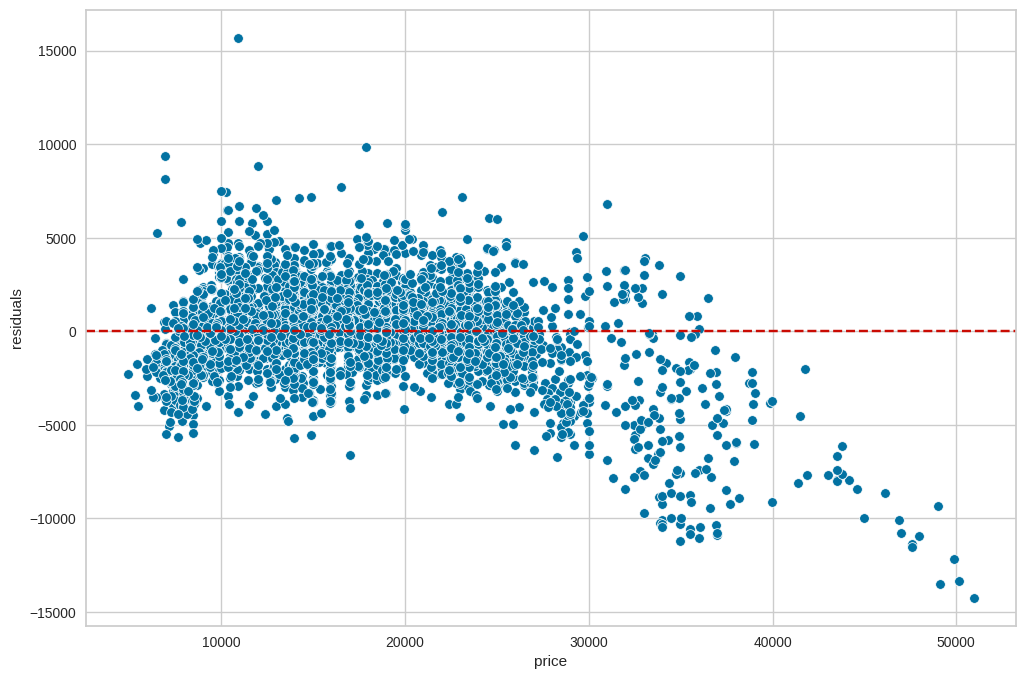

In [115]:
plt.figure(figsize=(12,8))
residuals = y_test2-y_pred

sns.scatterplot(x = y_test2, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [118]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

scores = cross_validate(model,
                        X_train_trans2,
                        y_train2,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [119]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.021,0.008,0.885,0.882,-1665.046,-1648.924,-5542061.516,-5372867.171,-2354.158,-2317.945
1,0.040,0.007,0.898,0.880,-1587.718,-1664.829,-4738710.741,-5461472.792,-2176.858,-2336.979
2,0.040,0.007,0.877,0.883,-1614.385,-1659.272,-5058328.869,-5425595.751,-2249.073,-2329.291
3,0.040,0.006,0.874,0.883,-1655.695,-1654.484,-5361601.143,-5392377.523,-2315.513,-2322.149
4,0.021,0.003,0.877,0.883,-1726.655,-1649.678,-5567814.158,-5370589.693,-2359.622,-2317.453
5,0.020,0.004,0.882,0.882,-1655.844,-1654.936,-5412089.204,-5385719.533,-2326.390,-2320.715
6,0.020,0.004,0.885,0.882,-1620.602,-1664.051,-4836967.083,-5450538.215,-2199.311,-2334.639
7,0.020,0.004,0.874,0.883,-1720.368,-1641.681,-6408159.166,-5277280.871,-2531.434,-2297.233
8,0.020,0.004,0.880,0.882,-1656.647,-1652.230,-5560421.658,-5368962.222,-2358.055,-2317.102
9,0.033,0.006,0.875,0.883,-1719.330,-1644.343,-5977074.571,-5324661.070,-2444.806,-2307.523


## 4. Implement Ridge Regression

### Without Outliers

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ridge", Ridge()),]
ridge_model = Pipeline(steps=operations)

In [138]:
ridge_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ridge', Ridge())])

In [139]:
train_val(ridge_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.882,0.880
mae,1652.910,1657.762
mse,5387663.057,5441952.491
rmse,2321.134,2332.799


In [140]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [141]:
y_pred = ridge_model.predict(X_test2)
adj_r2(y_test2, y_pred, X2)

0.880165947698437

In [142]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ridge", Ridge()),]
ridge_model = Pipeline(steps=operations)

scores = cross_validate(ridge_model,
                        X_train2,
                        y_train2,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [143]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.052,0.015,0.885,0.882,-1663.926,-1647.856,-5551006.387,-5374655.538,-2356.057,-2318.330
1,0.061,0.014,0.898,0.880,-1585.873,-1664.086,-4740174.842,-5463460.522,-2177.194,-2337.405
2,0.061,0.014,0.877,0.882,-1613.083,-1658.519,-5063862.533,-5427530.914,-2250.303,-2329.706
3,0.062,0.014,0.873,0.883,-1656.091,-1653.550,-5367986.389,-5394345.257,-2316.892,-2322.573
4,0.060,0.016,0.877,0.883,-1722.308,-1648.793,-5557309.570,-5372381.995,-2357.395,-2317.840
5,0.056,0.014,0.882,0.882,-1653.663,-1654.028,-5405606.446,-5386758.791,-2324.996,-2320.939
6,0.065,0.015,0.886,0.882,-1619.391,-1662.845,-4829945.274,-5452529.532,-2197.714,-2335.065
7,0.063,0.014,0.874,0.883,-1720.861,-1640.564,-6418564.871,-5279230.437,-2533.489,-2297.658
8,0.069,0.025,0.880,0.882,-1656.318,-1651.432,-5559695.535,-5371174.729,-2357.901,-2317.579
9,0.059,0.015,0.875,0.883,-1716.348,-1643.293,-5969481.631,-5326732.501,-2443.252,-2307.972


In [69]:
from sklearn.model_selection import GridSearchCV

In [205]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':[0.001,0.01, 0.5, 0.1, 1,  2, 3]}

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [206]:
ridge_grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'New',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered']]),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('Ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'Ridge__alpha': [0.001, 0.01, 0.5, 0.1, 1, 2, 3]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [207]:
ridge_grid_model.best_params_

{'Ridge__alpha': 0.5}

In [208]:
train_val(ridge_grid_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.882,0.880
mae,1653.253,1657.613
mse,5386477.486,5442827.100
rmse,2320.879,2332.987


## 5. Implement Lasso  Regression

### Without Outliers

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ridge", Lasso()),]
Lasso_model = Pipeline(steps=operations)

In [62]:
Lasso_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ridge', Lasso())])

In [63]:
train_val(Lasso_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.882,0.881
mae,1653.734,1657.354
mse,5392222.485,5433380.392
rmse,2322.116,2330.961


In [64]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [65]:
y_pred = Lasso_model.predict(X_test2)
adj_r2(y_test2, y_pred, X2)

0.8803547088772066

In [66]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ridge", Lasso()),]
Lasso_model = Pipeline(steps=operations)

scores = cross_validate(Lasso_model,
                        X_train2,
                        y_train2,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [67]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.257,0.020,0.885,0.882,-1664.185,-1648.705,-5552816.136,-5377549.566,-2356.441,-2318.954
1,0.248,0.019,0.898,0.880,-1586.307,-1664.819,-4748295.432,-5468188.911,-2179.058,-2338.416
2,0.232,0.019,0.877,0.882,-1611.531,-1659.475,-5054252.762,-5432307.660,-2248.167,-2330.731
3,0.254,0.024,0.873,0.883,-1656.376,-1654.391,-5374278.269,-5398689.863,-2318.249,-2323.508
4,0.242,0.019,0.877,0.882,-1720.209,-1649.787,-5534719.048,-5376298.497,-2352.598,-2318.685
5,0.279,0.022,0.882,0.882,-1652.764,-1654.691,-5398993.371,-5391975.177,-2323.573,-2322.063
6,0.261,0.019,0.886,0.882,-1619.380,-1663.701,-4823782.979,-5456890.058,-2196.311,-2335.999
7,0.279,0.019,0.873,0.883,-1722.662,-1641.447,-6424644.863,-5283443.190,-2534.688,-2298.574
8,0.271,0.026,0.880,0.882,-1655.456,-1652.422,-5557455.890,-5376756.968,-2357.426,-2318.784
9,0.238,0.018,0.875,0.883,-1715.409,-1644.024,-5965622.570,-5331045.355,-2442.462,-2308.906


In [70]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':[0.001,0.01, 0.5, 0.1, 1,  2, 3]} # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [71]:
lasso_grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'New',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered']]),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('Lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'Lasso__alpha': [0.001, 0.01, 0.5, 0.1, 1, 2, 3]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [72]:
lasso_grid_model.best_params_

{'Lasso__alpha': 0.5}

In [73]:
train_val(lasso_grid_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.882,0.881
mae,1653.710,1657.239
mse,5388846.633,5435083.849
rmse,2321.389,2331.327


## 6. Implement  Elastic-Net

### Without Outliers

In [170]:
from sklearn.linear_model import ElasticNet

In [171]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)


In [172]:
elastic_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel', 'Paint_Type',
                                                   'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('ElasticNet', ElasticNet())])

In [173]:
train_val(elastic_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.483,0.481
mae,3698.602,3713.199
mse,23625390.546,23595624.837
rmse,4860.596,4857.533


In [ ]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [174]:
y_pred = elastic_model.predict(X_test2)
adj_r2(y_test2, y_pred, X2)

0.4804145487636422

In [175]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

scores = cross_validate(elastic_model,
                        X_train2,
                        y_train2,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [176]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.183,0.049,0.482,0.481,-3715.242,-3699.175,-25012250.508,-23541130.329,-5001.225,-4851.920
1,0.171,0.031,0.485,0.482,-3783.280,-3693.933,-24009530.585,-23638088.116,-4899.952,-4861.902
2,0.150,0.057,0.479,0.486,-3618.882,-3703.910,-21420056.283,-23754187.474,-4628.181,-4873.827
3,0.133,0.033,0.482,0.485,-3716.138,-3696.076,-21973194.939,-23716632.908,-4687.557,-4869.973
4,0.138,0.030,0.477,0.484,-3708.975,-3694.985,-23600321.069,-23595865.742,-4858.016,-4857.558
5,0.130,0.043,0.485,0.490,-3686.241,-3671.669,-23626126.386,-23276248.083,-4860.671,-4824.546
6,0.111,0.030,0.500,0.483,-3619.542,-3701.554,-21127302.873,-23838616.205,-4596.445,-4882.481
7,0.127,0.037,0.471,0.482,-3730.861,-3696.588,-26882339.697,-23354855.806,-5184.818,-4832.686
8,0.107,0.045,0.485,0.482,-3655.643,-3702.912,-23794500.295,-23618387.019,-4877.961,-4859.875
9,0.142,0.036,0.480,0.482,-3751.793,-3694.533,-24854416.182,-23536709.824,-4985.420,-4851.465


In [212]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet())]

model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha':[0.001,0.01, 0.5, 0.1, 1,  2, 3],
              'ElasticNet__l1_ratio':[.5, .7, .9, .95, .99, 1]}
lasso_grid_model.best_params_
elastic_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [213]:
elastic_grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'vat',
                                                                          'Fuel',
                                                                          'Paint_Type',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     "Employee's "
                                                                                                     'car',
                                                                                                     'New',
                                                                                                     'Demonstration',
                                                                                                     'Pre-registered']]),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.001, 0.01, 0.5, 0.1, 1, 2, 3],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [214]:
elastic_grid_model.best_params_

{'ElasticNet__alpha': 0.5, 'ElasticNet__l1_ratio': 1}

In [215]:
train_val(elastic_grid_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.882,0.881
mae,1653.710,1657.239
mse,5388846.633,5435083.849
rmse,2321.389,2331.327


## 7. Feature İmportance

In [74]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_,
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

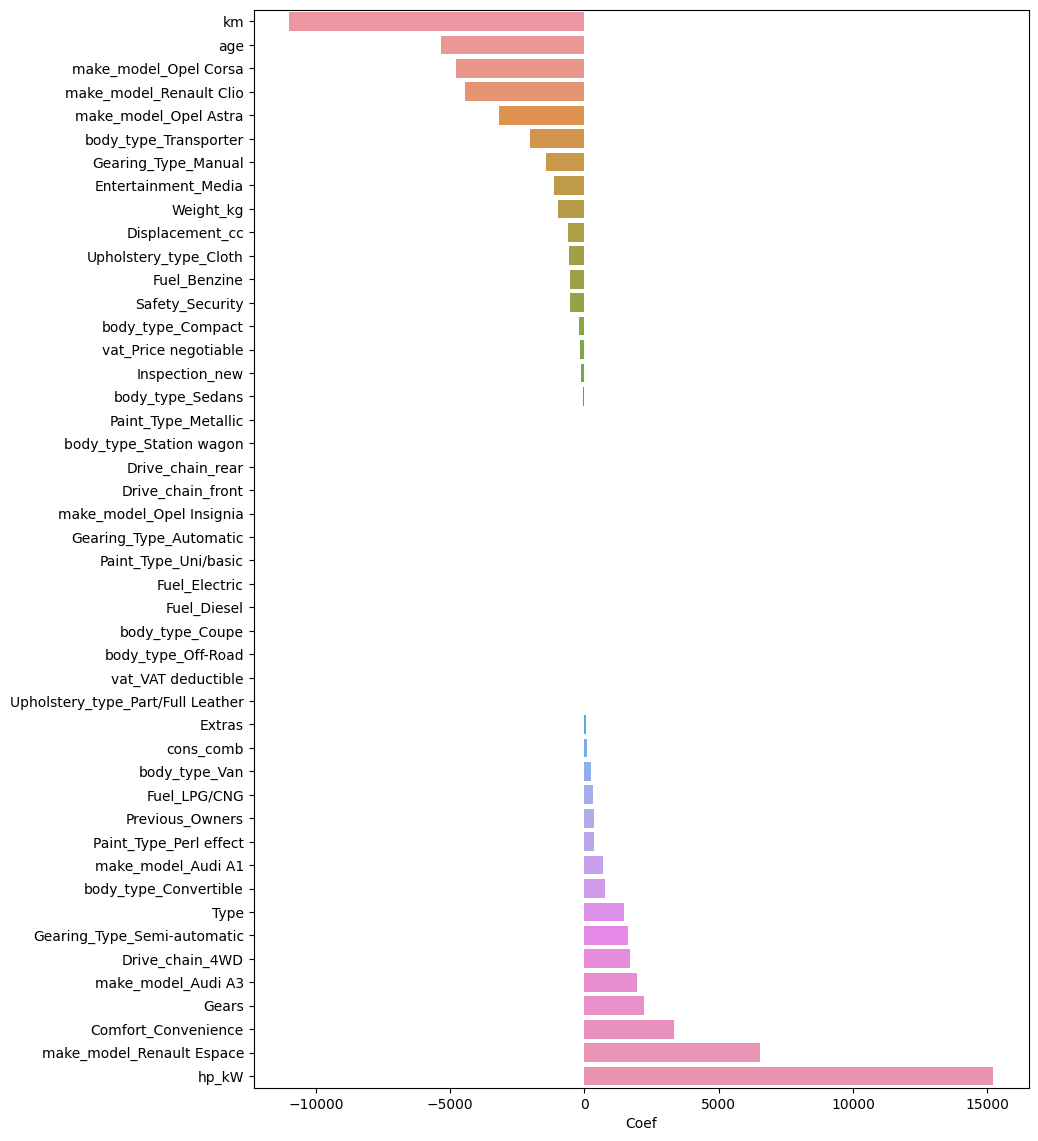

In [75]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp,
            x=df_feat_imp.Coef,
            y=df_feat_imp.index);

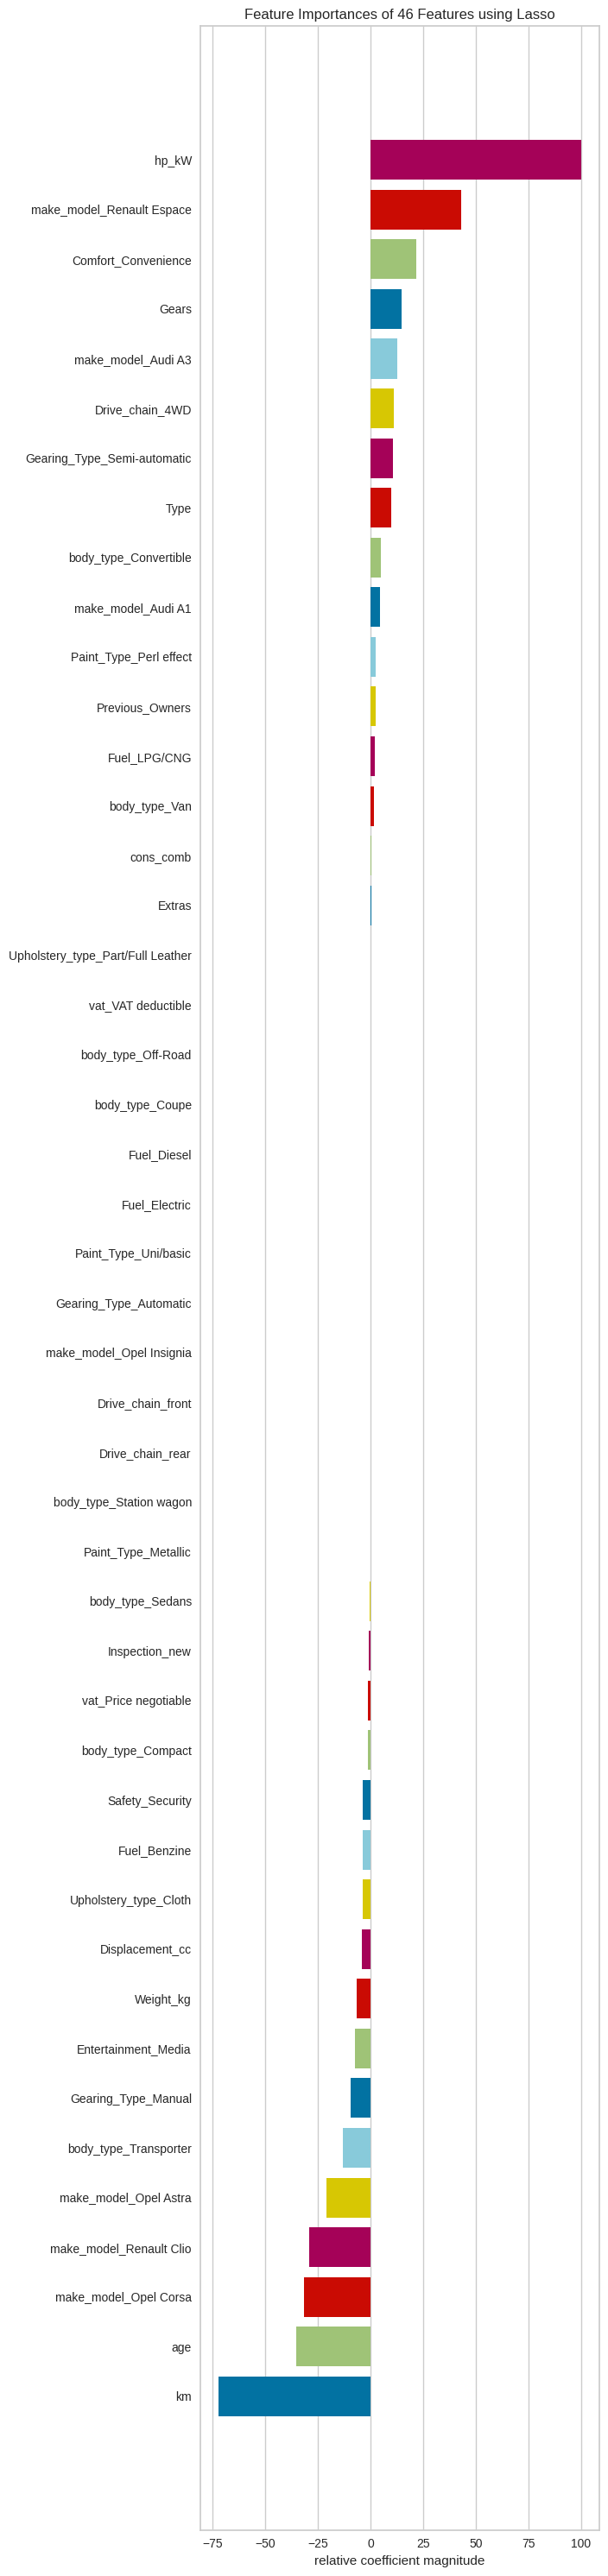

In [78]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"]

viz = FeatureImportances(model,
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train2, y_train2)
viz.show();

# We do not forget that we need to use the lasso model, as we will do a feature selection.

In [93]:
df_new = df2[["make_model", "hp_kW", "km","age", "price", "Gearing_Type", "Gears"]]
df_new.head()

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000


In [94]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
cat_onehot = ['make_model', 'Gearing_Type']

In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler


column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                         remainder='passthrough',
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

## 8. Final Model

In [98]:
from sklearn.pipeline import Pipeline

In [99]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.05))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)



,train,test
R2,0.872,0.872
mae,1698.011,1686.074
mse,5827517.149,5826284.849
rmse,2414.025,2413.770


In [105]:
import pickle
filename = 'lasso_final_model'
pickle.dump(lasso_final_model, open(filename, 'wb'))

In [106]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [107]:
y_pred = lasso_final_model.predict(X_test)
eval_metrics(y_test, y_pred)

 r2_score: 0.8722200104793683 
 mae: 1686.0741394105587 
 mse: 5826284.84916612 
 rmse: 2413.7698417964625


In [108]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations
    p = X.shape[1] # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [110]:
y_pred = lasso_final_model.predict(X_test)


In [111]:
adj_r2(y_test, y_pred, X_test)


0.8719429306321966

In [100]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "Gears": 7,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [101]:
new_obs = pd.DataFrame([my_dict])

In [102]:
lasso_final_model.predict(new_obs)

array([19539.89032305])

**deployment**

In [112]:
final_model = pickle.load(open('lasso_final_model', 'rb'))

In [113]:
columns=list(X.columns)
columns

['make_model', 'hp_kW', 'km', 'age', 'Gearing_Type', 'Gears']

In [114]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "Gears": 7,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"

}

In [115]:
df = pd.DataFrame.from_dict([my_dict])

In [116]:
df

,hp_kW,age,km,Gears,make_model,Gearing_Type
0,66,2,17000,7,Audi A3,Automatic


In [117]:
prediction = final_model.predict(df)
print(prediction)

[19539.89032305]


In [120]:
print("The estimated value of sales is {}. ".format(int(prediction[0])))

The estimated value of sales is 19539. 
